In [90]:
# data Analysis
import pandas as pd
import numpy as np
import random as rng

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#SciKit Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,learning_curve

from xgboost import XGBClassifier

import itertools
from rfpimp import importances,plot_importances

In [200]:
from subprocess import check_output
print(check_output(["ls", "Scrapers/data"]).decode("utf8"))
data = pd.read_csv("Scrapers/data/finalout.csv")

2to1.py
edit_json_template.py
fighter_profile_template.json
fight_json
finalout.csv
json_with_other_template
move_files.py
profile_json
profile_links
results_record.json
time_bound_profiles



In [201]:
data.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,2318.000000,2318.000000,2301.000000,2301.000000,2318.000000,2306.000000,1647.000000,1647.000000,1647.000000,1647.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2.391286,0.744607,31.776184,177.327249,2120.001726,73.699480,0.074681,1.103825,0.577413,3.852459,...,251.411111,33.644444,64.903704,6.855556,3.977778,4.303704,12.011111,262.740741,4.381481,303.103704
std,2.539978,1.145596,4.165267,8.807620,705.089725,15.425347,0.305691,1.537946,1.049758,5.261864,...,197.588561,75.756504,100.516057,25.786323,13.039241,12.810181,39.171198,199.940529,20.941919,224.848078
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000,172.000000,1910.250000,61.000000,0.000000,0.000000,0.000000,0.000000,...,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,178.000000
50%,2.000000,0.000000,31.000000,177.000000,2230.000000,70.000000,0.000000,1.000000,0.000000,2.000000,...,222.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,258.500000,0.000000,296.500000
75%,4.000000,1.000000,35.000000,182.000000,2709.000000,84.000000,0.000000,2.000000,1.000000,5.000000,...,299.000000,34.000000,98.000000,0.000000,0.000000,0.000000,2.000000,300.000000,0.000000,364.000000
max,14.000000,10.000000,48.000000,213.000000,3196.000000,120.000000,3.000000,13.000000,8.000000,47.000000,...,1259.000000,633.000000,666.000000,144.000000,91.000000,62.000000,273.000000,1291.000000,200.000000,1473.000000


In [202]:
data.describe(include=['O'])

,B_HomeTown,B_Location,B_Name,Date,R_HomeTown,R_Location,R_Name,winby,winner
count,2301,2305,2318,2318,2293,2294,2318,2282,2318
unique,724,567,949,389,652,504,842,3,4
top,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Kevin Lee,10/08/2018,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Donald Cerrone,DEC,red
freq,46,58,11,76,65,99,14,1111,1327


### Some Notes to observe
- Red Side seems to win slightly more than blue (1372/2318 = 59.188%)
- Donald Cerrone fights on Red side more than any other fighter, with 14 fights
- Kevin Lee fights on Blue side more than any other fighter with 11
- Most Fights are won by decision
- The Most common hometown and training location for fighters is Rei De Janeiro in Brazil

In [203]:
data.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [204]:
data.tail()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
2313,7,0,34.0,172.0,"El Paso, Texas United States",1137,"Coconut Creek, Florida United States",Nik Lentz,70.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,blue
2314,9,1,31.0,177.0,"Milwaukee, Wisconsin United States",1069,"Milwaukee, Wisconsin United States",Anthony Pettis,70.0,3.0,...,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,KO/TKO,red
2315,5,3,35.0,180.0,Amazonas Brazil,2101,Rio de Janeiro Brazil,Alan Patrick,70.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
2316,1,0,37.0,170.0,"Moses Lake, Washington United States",1200,"Houston, Texas United States",Tonya Evinger,61.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
2317,0,0,23.0,190.0,"Los Angeles, California United States",3072,"Fontana, California United States",Jalin Turner,70.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red


In [205]:
data.fillna(value=0,inplace=True)

In [206]:
data.tail()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
2313,7,0,34.0,172.0,"El Paso, Texas United States",1137,"Coconut Creek, Florida United States",Nik Lentz,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,blue
2314,9,1,31.0,177.0,"Milwaukee, Wisconsin United States",1069,"Milwaukee, Wisconsin United States",Anthony Pettis,70.0,3.0,...,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,KO/TKO,red
2315,5,3,35.0,180.0,Amazonas Brazil,2101,Rio de Janeiro Brazil,Alan Patrick,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red
2316,1,0,37.0,170.0,"Moses Lake, Washington United States",1200,"Houston, Texas United States",Tonya Evinger,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red
2317,0,0,23.0,190.0,"Los Angeles, California United States",3072,"Fontana, California United States",Jalin Turner,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red


In [208]:
dropdata = data.drop(['B_ID','B_Name','R_ID','R_Name','winby','Date','Event_ID', 'Fight_ID','Max_round','Last_round'],axis=1)
dropdata = dropdata.drop(['B_Weight','R_Weight','B_HomeTown','R_HomeTown','B_Location','R_Location'],axis=1)
dropdata.rename(columns={'BPrev':'B__Prev',
                         'RPrev':'R__Prev',
                         'B_Age':'B__Age',
                         'B_Height':'B__Height',
                         'B_Weight':'B__Weight',
                         'R_Age':'R__Age',
                         'R_Height':'R__Height',
                         'R_Weight':'R__Weight',
                         'BStreak':'B__Streak',
                         'RStreak': 'R__Streak'},inplace=True)
dropdata.describe()

,B__Prev,B__Streak,B__Age,B__Height,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,...,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,2.391286,0.744607,31.543141,176.026747,0.053063,0.784297,0.410267,2.737274,1.177739,10.815358,...,29.284297,3.918896,7.559965,0.798533,0.463330,0.501294,1.399051,30.603969,0.510354,35.305436
std,2.539978,1.145596,4.957445,17.493625,0.259871,1.389608,0.922747,4.766856,2.192778,15.186241,...,105.072644,27.979205,40.083680,9.057408,4.622587,4.578076,13.892178,108.390717,7.272762,123.807764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000,172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,31.000000,177.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,35.000000,182.000000,0.000000,1.000000,0.000000,4.000000,1.750000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,10.000000,48.000000,213.000000,3.000000,13.000000,8.000000,47.000000,20.000000,124.000000,...,1259.000000,633.000000,666.000000,144.000000,91.000000,62.000000,273.000000,1291.000000,200.000000,1473.000000


In [209]:
dropdata.describe(include=['O'])

,winner
count,2318
unique,4
top,red
freq,1327


In [210]:
objecttypes = list(dropdata.select_dtypes(include=['O']).columns)
for col in objecttypes:
    dropdata[col] = dropdata[col].astype('category')

In [211]:
cat_columns = dropdata.select_dtypes(['category']).columns
dropdata[cat_columns] = dropdata[cat_columns].apply(lambda x: x.cat.codes)
dropdata.info()
dropdata.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Columns: 878 entries, B__Prev to winner
dtypes: float64(874), int64(3), int8(1)
memory usage: 15.5 MB


,B__Prev,B__Streak,B__Age,B__Height,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
2313,7,0,34.0,172.0,0.0,3.0,3.0,24.0,7.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2314,9,1,31.0,177.0,3.0,6.0,1.0,2.0,0.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,3
2315,5,3,35.0,180.0,0.0,1.0,1.0,25.0,12.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2316,1,0,37.0,170.0,0.0,0.0,0.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2317,0,0,23.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [212]:
dropdata.head()

,B__Prev,B__Streak,B__Age,B__Height,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
0,0,0,38.0,193.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,36.0,172.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0,0,39.0,167.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0,0,33.0,167.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0,0,36.0,185.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


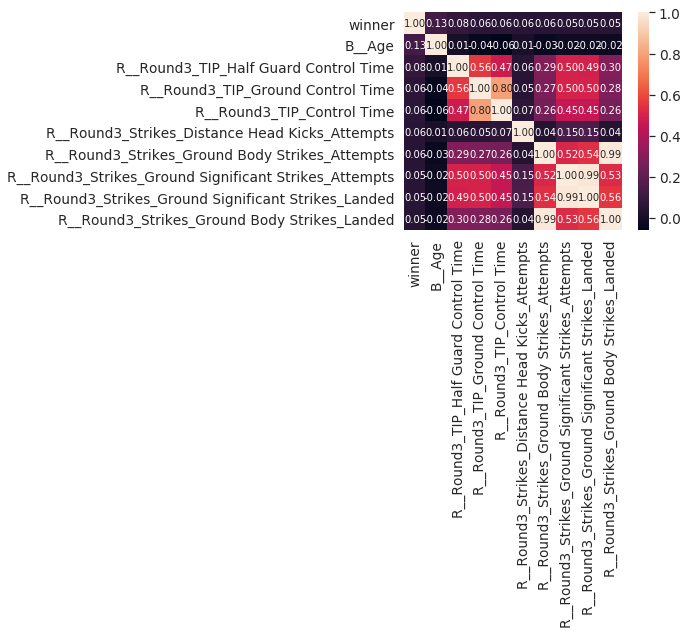

In [213]:
k = 10 #number of variables for heatmap
corrmat = dropdata.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(dropdata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [214]:
def plot_cm(cm,title): 
    plt.figure()
    labels = ['Blue','D','N','Red']
    plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()

In [215]:
def ranfor(X_train,Y_train,X_test,Y_test,results):
    randomfor = RandomForestClassifier(max_features="sqrt",
                                       n_estimators = 700,
                                       max_depth = None,
                                       n_jobs=-1
                                      )
    randomfor.fit(X_train,Y_train)
    Y_pred = randomfor.predict(X_test)
    results['Random Forests'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def svm(X_train,Y_train,X_test,Y_test,results):
    svc = SVC()
    svc.fit(X_train, Y_train)
    Y_pred = svc.predict(X_test)
    results['SVM'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def xgb(X_train,Y_train,X_test,Y_test,results):
    xgbc = XGBClassifier()
    xgbc.fit(X_train, Y_train)
    Y_pred = xgbc.predict(X_test)
    results['xgb'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return


def run_all(df):
    X_all = df.drop(['winner'], axis=1)
    y_all = df['winner']
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
    
    results = dict()
    
    ranfor(X_train,Y_train,X_test,Y_test,results)
    svm(X_train,Y_train,X_test,Y_test,results)
    xgb(X_train,Y_train,X_test,Y_test,results)
    
    return results

In [216]:
def pprint_results(results):
    for model in results.keys():
        print(f'Accuracy of {model} = {results[model][0]}')
        plot_cm(results[model][1],f"{model} CM")

In [217]:
def draw_learning_curve(model,X,Y):
    train_sizes,train_scores,test_scores = learning_curve(model,X,Y,cv=5,train_sizes=[500,1000,1500,1852])
    train_scores_mean = np.mean(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    plt.grid()
    plt.xlabel("Training_examples")
    plt.ylabel("Scores")
    plt.plot(train_sizes,train_scores_mean,label="Training_scores")
    plt.plot(train_sizes,test_scores_mean,label="Test Scores")
    plt.legend(loc="best")
    plt.title("Learning Curve")

In [218]:
def get_feature_imp(model,X,Y, return_n_top_fetures = 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    model.fit(X_train,Y_train)
    imp = importances(model, X_test, Y_test)
    return imp.head(n=return_n_top_fetures)

In [219]:
results_stock = run_all(dropdata)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5689655172413793
Accuracy of SVM = 0.5732758620689655
Accuracy of xgb = 0.6120689655172413


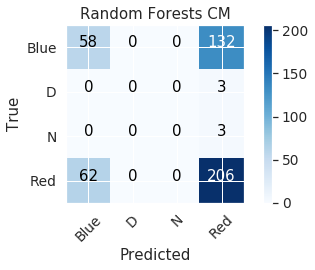

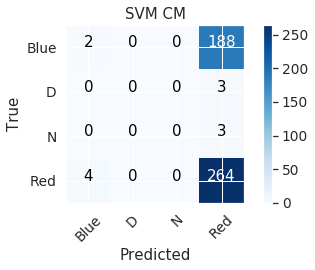

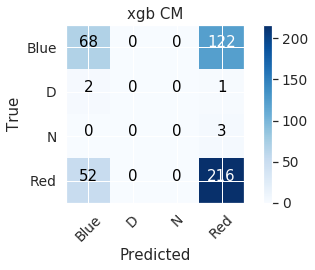

In [220]:
pprint_results(results_stock)

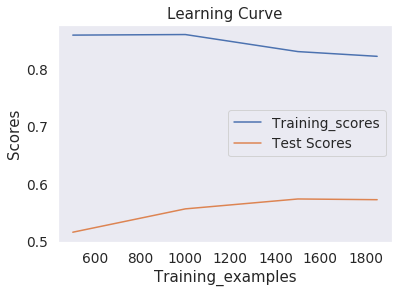

In [221]:
draw_learning_curve(XGBClassifier(),dropdata.drop(['winner'], axis=1),dropdata['winner'])

In [222]:
top_10_stock_features = get_feature_imp(XGBClassifier(),dropdata.drop(['winner'], axis=1),dropdata['winner'])

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


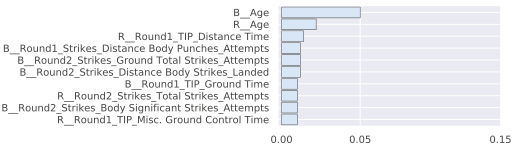

In [223]:
plot_importances(top_10_stock_features)

## Dropping round 4 and 5

In [224]:
r4 = [col for col in dropdata.columns if "Round4" in col]
r5 = [col for col in dropdata.columns if "Round5" in col]

In [225]:
threerounds_data = dropdata.drop(r4+r5,axis = 1)

In [226]:
results_threeround = run_all(threerounds_data)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5560344827586207
Accuracy of SVM = 0.5732758620689655
Accuracy of xgb = 0.6163793103448276


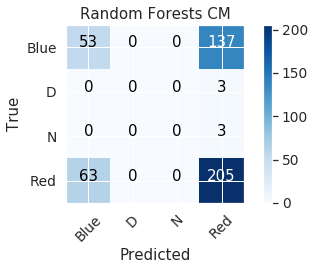

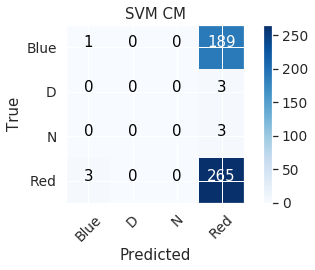

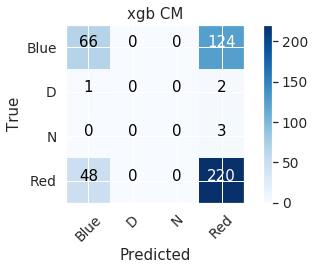

In [227]:
pprint_results(results_threeround)

In [228]:
top_10_threeround_features = get_feature_imp(XGBClassifier(),threerounds_data.drop(['winner'], axis=1),threerounds_data['winner'])

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


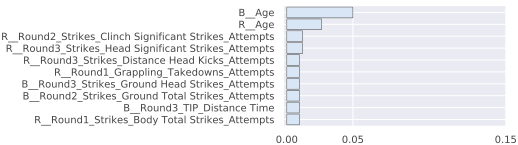

In [229]:
plot_importances(top_10_threeround_features)

## Only using top 10 features

In [230]:
top_10_f = top_10_stock_features.index.values

In [231]:
top_10_f = np.append(top_10_f,'winner')

In [232]:
col_to_drop = np.setdiff1d(dropdata.columns,top_10_f)

In [233]:
top_10_data = dropdata.drop(columns=col_to_drop,axis=1)

In [234]:
top_10_data.tail()

,B__Age,B__Round1_Strikes_Distance Body Punches_Attempts,B__Round1_TIP_Ground Time,B__Round2_Strikes_Body Significant Strikes_Attempts,B__Round2_Strikes_Distance Body Strikes_Landed,B__Round2_Strikes_Ground Total Strikes_Attempts,R__Age,R__Round1_TIP_Distance Time,R__Round1_TIP_Misc. Ground Control Time,R__Round2_Strikes_Total Strikes_Attempts,winner
2313,34.0,0.0,693.0,44.0,24.0,100.0,39.0,974.0,21.0,77.0,0
2314,31.0,0.0,547.0,49.0,20.0,67.0,34.0,1745.0,4.0,402.0,3
2315,35.0,1.0,634.0,9.0,3.0,131.0,35.0,790.0,45.0,352.0,3
2316,37.0,0.0,0.0,6.0,2.0,0.0,23.0,56.0,0.0,52.0,3
2317,23.0,0.0,0.0,0.0,0.0,0.0,26.0,900.0,15.0,122.0,3


In [235]:
resuts_top10 = run_all(top_10_data)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5775862068965517
Accuracy of SVM = 0.5732758620689655
Accuracy of xgb = 0.5948275862068966


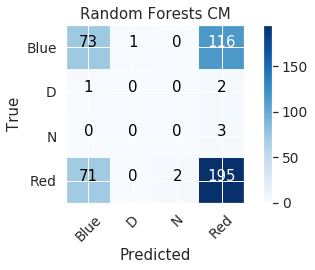

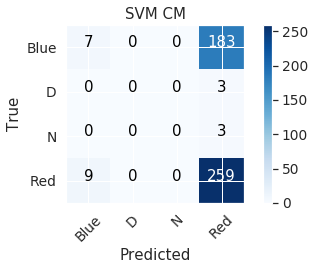

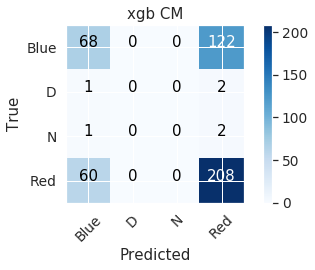

In [236]:
pprint_results(resuts_top10)

## Drop rounds in itself

In [237]:
blue_cols = [col for col in dropdata.columns if 'B__' in col]
red_cols = [col for col in dropdata.columns if 'R__' in col]

In [238]:
b_feats = list(set([x[10:] for x in blue_cols if "Round" in x]))
r_feats = list(set([x[10:] for x in red_cols if "Round" in x]))

In [239]:
fight_data = dropdata.copy()

In [240]:
def make_columns(b_feats,cols,color='B__'):
    for x in b_feats:
        fight_data.loc[:,f'{color}{x}'] = 0
        for y in cols:
            if x in y and y[:3]==color:
                fight_data[f'{color}{x}'] += fight_data[y]
                fight_data.drop(y,axis=1,inplace=True)

In [241]:
make_columns(b_feats,blue_cols)
make_columns(r_feats,red_cols,color='R__')

In [242]:
fight_data.tail()

,B__Prev,B__Streak,B__Age,B__Height,R__Prev,R__Age,R__Height,winner,B__Strikes_Clinch Total Strikes_Attempts,B__TIP_Guard Control Time,...,R__TIP_Standing Time,R__Grappling_Submissions_Attempts,R__Strikes_Distance Leg Kicks_Landed,R__Strikes_Distance Head Strikes_Attempts,R__Strikes_Clinch Significant Kicks_Attempts,R__Strikes_Body Total Strikes_Landed,R__Strikes_Distance Body Strikes_Landed,R__Strikes_Kicks_Attempts,R__Strikes_Distance Head Kicks_Attempts,R__Strikes_Body Total Strikes_Attempts
2313,7,0,34.0,172.0,5,39.0,172.0,0,124.0,11.0,...,2572.0,3.0,0.0,143.0,0.0,44.0,12.0,0.0,0.0,60.0
2314,9,1,31.0,177.0,9,34.0,180.0,3,119.0,73.0,...,4403.0,13.0,18.0,786.0,2.0,97.0,85.0,40.0,4.0,149.0
2315,5,3,35.0,180.0,6,35.0,175.0,3,28.0,633.0,...,3286.0,2.0,0.0,403.0,0.0,162.0,43.0,0.0,0.0,203.0
2316,1,0,37.0,170.0,1,23.0,167.0,3,9.0,0.0,...,333.0,0.0,0.0,22.0,0.0,10.0,1.0,0.0,0.0,13.0
2317,0,0,23.0,190.0,8,26.0,180.0,3,0.0,0.0,...,2252.0,4.0,0.0,230.0,0.0,54.0,16.0,0.0,0.0,71.0


In [243]:
results_fightdata = run_all(fight_data)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5926724137931034
Accuracy of SVM = 0.5689655172413793
Accuracy of xgb = 0.603448275862069


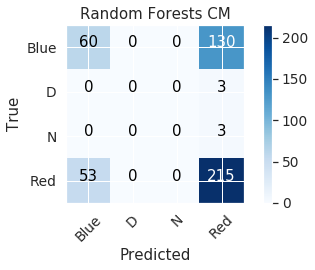

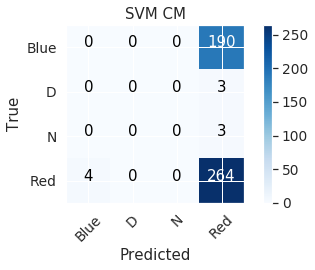

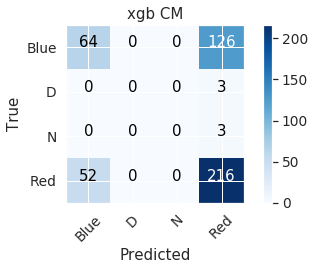

In [244]:
pprint_results(results_fightdata)

In [245]:
top_10_fight_features = get_feature_imp(XGBClassifier(),fight_data.drop(['winner'], axis=1),fight_data['winner'])

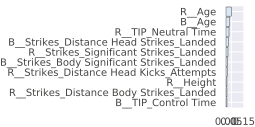

In [246]:
plot_importances(top_10_fight_features)

## Normalize feature with N_prev_fights Round data

In [247]:
norm_prev_data = dropdata.copy()

In [248]:
norm_prev_data['B__Prev']= norm_prev_data['B__Prev']+1
norm_prev_data['R__Prev']= norm_prev_data['R__Prev']+1

In [249]:
def norm_columns(cols,color='B__'):
    for x in cols:
        if "Round" in x:
            norm_prev_data[x] = norm_prev_data[x]/norm_prev_data[f'{color}Prev']
    norm_prev_data.drop([f'{color}Prev'],axis=1,inplace=True)

In [250]:
norm_columns(blue_cols)
norm_columns(red_cols,color='R__')

In [251]:
norm_prev_data.tail()

,B__Streak,B__Age,B__Height,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,B__Round1_Strikes_Body Significant Strikes_Landed,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
2313,0,34.0,172.0,0.0,0.375000,0.375000,3.000000,0.875,5.625000,4.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2314,1,31.0,177.0,0.3,0.600000,0.100000,0.200000,0.000,6.600000,4.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,29.8,0.0,29.8,3
2315,3,35.0,180.0,0.0,0.166667,0.166667,4.166667,2.000,4.166667,2.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2316,0,37.0,170.0,0.0,0.000000,0.000000,1.500000,0.500,5.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2317,0,23.0,190.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [252]:
results_norm_prev = run_all(norm_prev_data)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5668103448275862
Accuracy of SVM = 0.5668103448275862
Accuracy of xgb = 0.5991379310344828


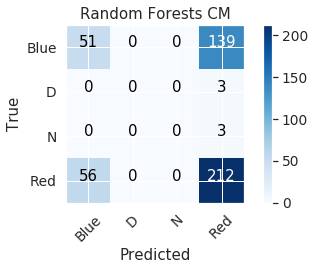

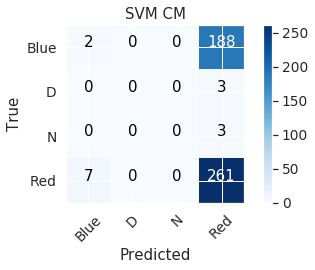

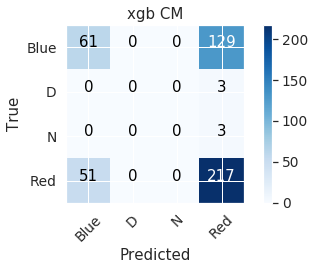

In [253]:
pprint_results(results_norm_prev)

## Normalize feature with N_prev_fights fight data

In [254]:
fight_data.tail()

,B__Prev,B__Streak,B__Age,B__Height,R__Prev,R__Age,R__Height,winner,B__Strikes_Clinch Total Strikes_Attempts,B__TIP_Guard Control Time,...,R__TIP_Standing Time,R__Grappling_Submissions_Attempts,R__Strikes_Distance Leg Kicks_Landed,R__Strikes_Distance Head Strikes_Attempts,R__Strikes_Clinch Significant Kicks_Attempts,R__Strikes_Body Total Strikes_Landed,R__Strikes_Distance Body Strikes_Landed,R__Strikes_Kicks_Attempts,R__Strikes_Distance Head Kicks_Attempts,R__Strikes_Body Total Strikes_Attempts
2313,7,0,34.0,172.0,5,39.0,172.0,0,124.0,11.0,...,2572.0,3.0,0.0,143.0,0.0,44.0,12.0,0.0,0.0,60.0
2314,9,1,31.0,177.0,9,34.0,180.0,3,119.0,73.0,...,4403.0,13.0,18.0,786.0,2.0,97.0,85.0,40.0,4.0,149.0
2315,5,3,35.0,180.0,6,35.0,175.0,3,28.0,633.0,...,3286.0,2.0,0.0,403.0,0.0,162.0,43.0,0.0,0.0,203.0
2316,1,0,37.0,170.0,1,23.0,167.0,3,9.0,0.0,...,333.0,0.0,0.0,22.0,0.0,10.0,1.0,0.0,0.0,13.0
2317,0,0,23.0,190.0,8,26.0,180.0,3,0.0,0.0,...,2252.0,4.0,0.0,230.0,0.0,54.0,16.0,0.0,0.0,71.0


In [255]:
fight_data_prev_norm = fight_data.copy()

In [256]:
fight_data_prev_norm["B__Prev"] = fight_data_prev_norm["B__Prev"]+1
fight_data_prev_norm["R__Prev"] = fight_data_prev_norm["R__Prev"]+1

In [257]:
def norm_columns_fight(fet_cols):
    for x in fight_data_prev_norm.columns:
        if x[3:] in fet_cols:
            if x[:3] == 'R__':
                fight_data_prev_norm[x] = fight_data_prev_norm[x]/fight_data_prev_norm['R__Prev']
            elif x[:3] == 'B__':
                fight_data_prev_norm[x] = fight_data_prev_norm[x]/fight_data_prev_norm['B__Prev']
    fight_data_prev_norm.drop(['R__Prev','B__Prev'],axis=1,inplace=True)

In [258]:
norm_columns_fight(b_feats)

In [259]:
fight_data_prev_norm.tail()

,B__Streak,B__Age,B__Height,R__Age,R__Height,winner,B__Strikes_Clinch Total Strikes_Attempts,B__TIP_Guard Control Time,B__Strikes_Legs Significant Strikes_Landed,B__Strikes_Distance Body Kicks_Landed,...,R__TIP_Standing Time,R__Grappling_Submissions_Attempts,R__Strikes_Distance Leg Kicks_Landed,R__Strikes_Distance Head Strikes_Attempts,R__Strikes_Clinch Significant Kicks_Attempts,R__Strikes_Body Total Strikes_Landed,R__Strikes_Distance Body Strikes_Landed,R__Strikes_Kicks_Attempts,R__Strikes_Distance Head Kicks_Attempts,R__Strikes_Body Total Strikes_Attempts
2313,0,34.0,172.0,39.0,172.0,0,15.500000,1.375,5.25,0.000000,...,428.666667,0.500000,0.0,23.833333,0.0,7.333333,2.000000,0.0,0.0,10.000000
2314,1,31.0,177.0,34.0,180.0,3,11.900000,7.300,4.30,0.400000,...,440.300000,1.300000,1.8,78.600000,0.2,9.700000,8.500000,4.0,0.4,14.900000
2315,3,35.0,180.0,35.0,175.0,3,4.666667,105.500,2.50,0.333333,...,469.428571,0.285714,0.0,57.571429,0.0,23.142857,6.142857,0.0,0.0,29.000000
2316,0,37.0,170.0,23.0,167.0,3,4.500000,0.000,5.00,0.000000,...,166.500000,0.000000,0.0,11.000000,0.0,5.000000,0.500000,0.0,0.0,6.500000
2317,0,23.0,190.0,26.0,180.0,3,0.000000,0.000,0.00,0.000000,...,250.222222,0.444444,0.0,25.555556,0.0,6.000000,1.777778,0.0,0.0,7.888889


In [260]:
results_norm_prev_fight = run_all(fight_data_prev_norm)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5646551724137931
Accuracy of SVM = 0.5625
Accuracy of xgb = 0.6077586206896551


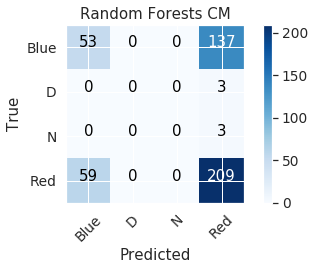

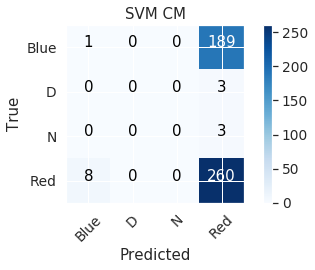

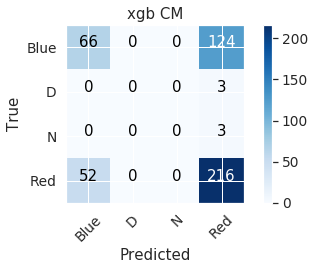

In [261]:
pprint_results(results_norm_prev_fight)

## Only keeping Strike, Grappel and TIP

In [271]:
main_move_data = fight_data.copy()

In [272]:
main_move_data.tail()

,B__Prev,B__Streak,B__Age,B__Height,R__Prev,R__Age,R__Height,winner,B__Strikes_Clinch Total Strikes_Attempts,B__TIP_Guard Control Time,...,R__TIP_Standing Time,R__Grappling_Submissions_Attempts,R__Strikes_Distance Leg Kicks_Landed,R__Strikes_Distance Head Strikes_Attempts,R__Strikes_Clinch Significant Kicks_Attempts,R__Strikes_Body Total Strikes_Landed,R__Strikes_Distance Body Strikes_Landed,R__Strikes_Kicks_Attempts,R__Strikes_Distance Head Kicks_Attempts,R__Strikes_Body Total Strikes_Attempts
2313,7,0,34.0,172.0,5,39.0,172.0,0,124.0,11.0,...,2572.0,3.0,0.0,143.0,0.0,44.0,12.0,0.0,0.0,60.0
2314,9,1,31.0,177.0,9,34.0,180.0,3,119.0,73.0,...,4403.0,13.0,18.0,786.0,2.0,97.0,85.0,40.0,4.0,149.0
2315,5,3,35.0,180.0,6,35.0,175.0,3,28.0,633.0,...,3286.0,2.0,0.0,403.0,0.0,162.0,43.0,0.0,0.0,203.0
2316,1,0,37.0,170.0,1,23.0,167.0,3,9.0,0.0,...,333.0,0.0,0.0,22.0,0.0,10.0,1.0,0.0,0.0,13.0
2317,0,0,23.0,190.0,8,26.0,180.0,3,0.0,0.0,...,2252.0,4.0,0.0,230.0,0.0,54.0,16.0,0.0,0.0,71.0


In [273]:
def make_main_move_data():
    main_move_data['R__STRIKES'] = 0
    main_move_data['R__Tip'] = 0
    main_move_data['R__GRAPPLING'] = 0
    main_move_data['B__STRIKES'] = 0
    main_move_data['B__Tip'] = 0
    main_move_data['B__GRAPPLING'] = 0
    
    for x in main_move_data.columns:
        if "Strikes" in x:
            if x[:3] == "R__":
                main_move_data['R__STRIKES'] = main_move_data['R__STRIKES']+main_move_data[x]
                main_move_data.drop([x],axis=1,inplace=True)
            elif x[:3]=="B__":
                main_move_data['B__STRIKES'] = main_move_data['B__STRIKES']+main_move_data[x]
                main_move_data.drop([x],axis=1,inplace=True)
        elif "TIP" in x:
            if x[:3] == "R__":
                main_move_data['R__Tip'] = main_move_data['R__Tip']+main_move_data[x]
                main_move_data.drop([x],axis=1,inplace=True)
            elif x[:3]=="B__":
                main_move_data['B__Tip'] = main_move_data['B__Tip']+main_move_data[x]
                main_move_data.drop([x],axis=1,inplace=True)
        elif "Grappling" in x:
            if x[:3] == "R__":
                main_move_data['R__GRAPPLING'] = main_move_data['R__GRAPPLING']+main_move_data[x]
                main_move_data.drop([x],axis=1,inplace=True)
            elif x[:3]=="B__":
                main_move_data['B__GRAPPLING'] = main_move_data['B__GRAPPLING']+main_move_data[x]
                main_move_data.drop([x],axis=1,inplace=True)

In [274]:
make_main_move_data()

In [276]:
main_move_data.drop(['B__Streak'],axis=1,inplace=True)

In [277]:
main_move_data.tail()

,B__Prev,B__Age,B__Height,R__Prev,R__Age,R__Height,winner,R__STRIKES,R__Tip,R__GRAPPLING,B__STRIKES,B__Tip,B__GRAPPLING
2313,7,34.0,172.0,5,39.0,172.0,0,2611.0,9516.0,64.0,6600.0,12518.0,76.0
2314,9,31.0,177.0,9,34.0,180.0,3,11728.0,16221.0,32.0,9349.0,17913.0,43.0
2315,5,35.0,180.0,6,35.0,175.0,3,9078.0,15633.0,67.0,4237.0,12574.0,72.0
2316,1,37.0,170.0,1,23.0,167.0,3,701.0,1310.0,2.0,725.0,2126.0,5.0
2317,0,23.0,190.0,8,26.0,180.0,3,3876.0,8996.0,28.0,0.0,0.0,0.0


In [278]:
results_main_move_data = run_all(main_move_data)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5625
Accuracy of SVM = 0.5646551724137931
Accuracy of xgb = 0.5926724137931034


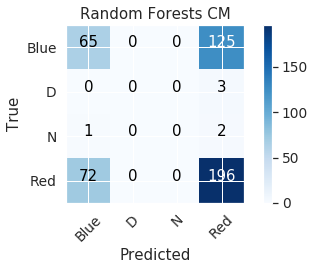

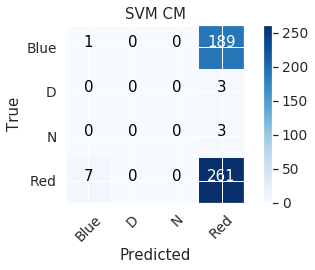

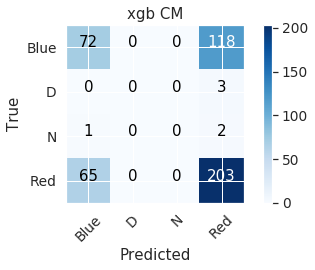

In [279]:
pprint_results(results_main_move_data)

## Normalize main move data

In [285]:
main_move_data_norm = main_move_data.copy()

In [286]:
main_move_data_norm['R__Prev'] = main_move_data_norm['R__Prev']+1
main_move_data_norm['B__Prev'] = main_move_data_norm['B__Prev']+1

In [287]:
main_move_data_norm['R__STRIKES'] = main_move_data_norm['R__STRIKES']/main_move_data_norm['R__Prev']
main_move_data_norm['R__Tip'] = main_move_data_norm['R__Tip']/main_move_data_norm['R__Prev']
main_move_data_norm['R__GRAPPLING'] = main_move_data_norm['R__GRAPPLING']/main_move_data_norm['R__Prev']
main_move_data_norm['B__STRIKES'] = main_move_data_norm['B__STRIKES']/main_move_data_norm['B__Prev']
main_move_data_norm['B__Tip'] = main_move_data_norm['B__Tip']/main_move_data_norm['B__Prev']
main_move_data_norm['B__GRAPPLING'] = main_move_data_norm['B__GRAPPLING']/main_move_data_norm['B__Prev']

In [288]:
main_move_data_norm.drop(['B__Prev','R__Prev'],axis=1,inplace=True)

In [289]:
main_move_data_norm.tail()

,B__Age,B__Height,R__Age,R__Height,winner,R__STRIKES,R__Tip,R__GRAPPLING,B__STRIKES,B__Tip,B__GRAPPLING
2313,34.0,172.0,39.0,172.0,0,435.166667,1586.000000,10.666667,825.000000,1564.750000,9.5
2314,31.0,177.0,34.0,180.0,3,1172.800000,1622.100000,3.200000,934.900000,1791.300000,4.3
2315,35.0,180.0,35.0,175.0,3,1296.857143,2233.285714,9.571429,706.166667,2095.666667,12.0
2316,37.0,170.0,23.0,167.0,3,350.500000,655.000000,1.000000,362.500000,1063.000000,2.5
2317,23.0,190.0,26.0,180.0,3,430.666667,999.555556,3.111111,0.000000,0.000000,0.0


In [290]:
results_main_move_data_norm = run_all(main_move_data_norm)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forests = 0.5625
Accuracy of SVM = 0.5668103448275862
Accuracy of xgb = 0.5732758620689655


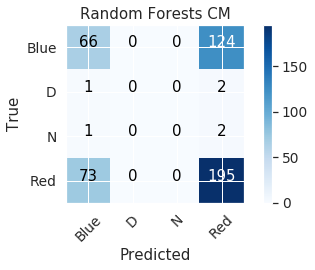

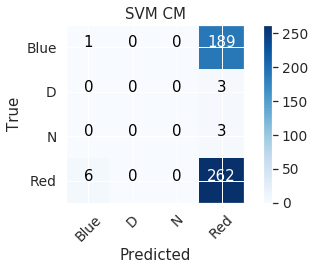

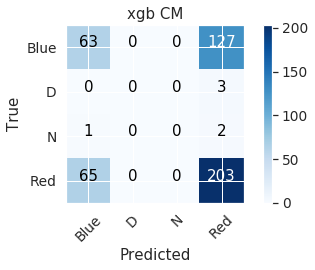

In [291]:
pprint_results(results_main_move_data_norm)